In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from PIL import Image
import io

In [31]:
df_runs = pd.read_csv('runs_with_logos.csv')
print(df_runs.head(5))

                             Unnamed: 0    team_name  games_played  \
0  faeb1160-5d15-4f26-99fc-c441cf21fc7f  Blue Devils            37   
1  ad4bc983-8d2e-4e6f-a8f9-80840a786c64   Sun Devils            27   
2  f38b58de-3273-4723-a78b-2f918e9aa2d5     Shockers            33   
3  7d797407-623e-476d-b299-46de4275414d     Bluejays            33   
4  ec0d6b67-4b16-4b50-92b2-1a651dae6b0f       Bruins            33   

   runs_per_game  runs_against_per_game  \
0       0.675676               0.189189   
1       0.629630               0.259259   
2       0.606061               0.181818   
3       0.606061               0.212121   
4       0.545455               0.272727   

                                                logo  
0  https://www.ncaa.com/sites/default/files/image...  
1  https://www.ncaa.com/sites/default/files/image...  
2  https://www.ncaa.com/sites/default/files/image...  
3  https://www.ncaa.com/sites/default/files/image...  
4  https://www.ncaa.com/sites/default/files/i

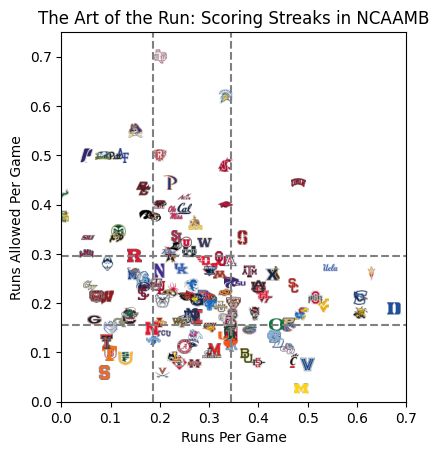

In [55]:
# Create a figure and axes object
fig, ax = plt.subplots()

# Iterate through the points and plot each one with its respective image
for index, team in df_runs.iterrows():
    # Download the image using urllib
    with urllib.request.urlopen(team['logo']) as url_response:
        img_data = url_response.read()

    # Open the image using Pillow
    img = Image.open(io.BytesIO(img_data))

    # Plot the image at the x,y coordinates
    ax.imshow(img, extent=((team['runs_per_game'])-.015, (team['runs_per_game'])+.015, (team['runs_against_per_game'])-.015, (team['runs_against_per_game'])+.015))

# Set the limits of the plot
ax.set_xlim(0, 0.7)
ax.set_ylim(0, 0.75)
ax.axvline(x=0.345159, color='gray', linestyle='--')
ax.axvline(x=0.186921, color='gray', linestyle='--')
ax.axhline(y=0.155649, color='gray', linestyle='--')
ax.axhline(y=0.296296, color='gray', linestyle='--')

# Show the plot

plt.xlabel('Runs Per Game')
plt.ylabel('Runs Allowed Per Game')
plt.title('The Art of the Run: Scoring Streaks in NCAAMB')
fig.savefig('2017_runs.png', dpi=300)
plt.show()


In [54]:
#descriptors
print(df_runs['runs_per_game'].quantile([0.25,.5,.75]))
print(df_runs['runs_against_per_game'].quantile([0.25,.5,.75]))

0.25    0.186921
0.50    0.263932
0.75    0.345159
Name: runs_per_game, dtype: float64
0.25    0.155649
0.50    0.214286
0.75    0.296296
Name: runs_against_per_game, dtype: float64
